In [39]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("carprediction.csv")

In [3]:
df = df.copy()
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [4]:
df.shape

(4340, 8)

In [5]:
#print the unique values of categorical variables

print(df["seller_type"].unique())
print(df["transmission"].unique())
print(df["owner"].unique())
print(df["fuel"].unique())

['Individual' 'Dealer' 'Trustmark Dealer']
['Manual' 'Automatic']
['First Owner' 'Second Owner' 'Fourth & Above Owner' 'Third Owner'
 'Test Drive Car']
['Petrol' 'Diesel' 'CNG' 'LPG' 'Electric']


In [6]:
#checking for the null values

df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [7]:
df.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [8]:
df = df.assign(years_used = lambda x: (2022 - x['year']))

In [9]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,years_used
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,15
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,15
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,10
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,5
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,8


In [10]:
df["name"].unique()

array(['Maruti 800 AC', 'Maruti Wagon R LXI Minor',
       'Hyundai Verna 1.6 SX', ..., 'Mahindra Verito 1.5 D6 BSIII',
       'Toyota Innova 2.5 VX (Diesel) 8 Seater BS IV',
       'Hyundai i20 Magna 1.4 CRDi'], dtype=object)

In [11]:
#dropping the name column as it is not much usefull
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'years_used'],
      dtype='object')

In [12]:
final_dataset = df[['year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'years_used']]

In [13]:
final_dataset.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,years_used
0,2007,60000,70000,Petrol,Individual,Manual,First Owner,15
1,2007,135000,50000,Petrol,Individual,Manual,First Owner,15
2,2012,600000,100000,Diesel,Individual,Manual,First Owner,10
3,2017,250000,46000,Petrol,Individual,Manual,First Owner,5
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner,8


In [14]:
final_dataset.drop(["year"],axis=1,inplace=True)

C:\Users\Newton\anaconda3\envs\carprediction\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [15]:
final_dataset.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,years_used
0,60000,70000,Petrol,Individual,Manual,First Owner,15
1,135000,50000,Petrol,Individual,Manual,First Owner,15
2,600000,100000,Diesel,Individual,Manual,First Owner,10
3,250000,46000,Petrol,Individual,Manual,First Owner,5
4,450000,141000,Diesel,Individual,Manual,Second Owner,8


In [16]:
#doing one hot encoding for the categorical variables

final_dataset= pd.get_dummies(final_dataset,drop_first=True)

In [17]:
final_dataset.head()

,selling_price,km_driven,years_used,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,60000,70000,15,0,0,0,1,1,0,1,0,0,0,0
1,135000,50000,15,0,0,0,1,1,0,1,0,0,0,0
2,600000,100000,10,1,0,0,0,1,0,1,0,0,0,0
3,250000,46000,5,0,0,0,1,1,0,1,0,0,0,0
4,450000,141000,8,1,0,0,0,1,0,1,0,1,0,0


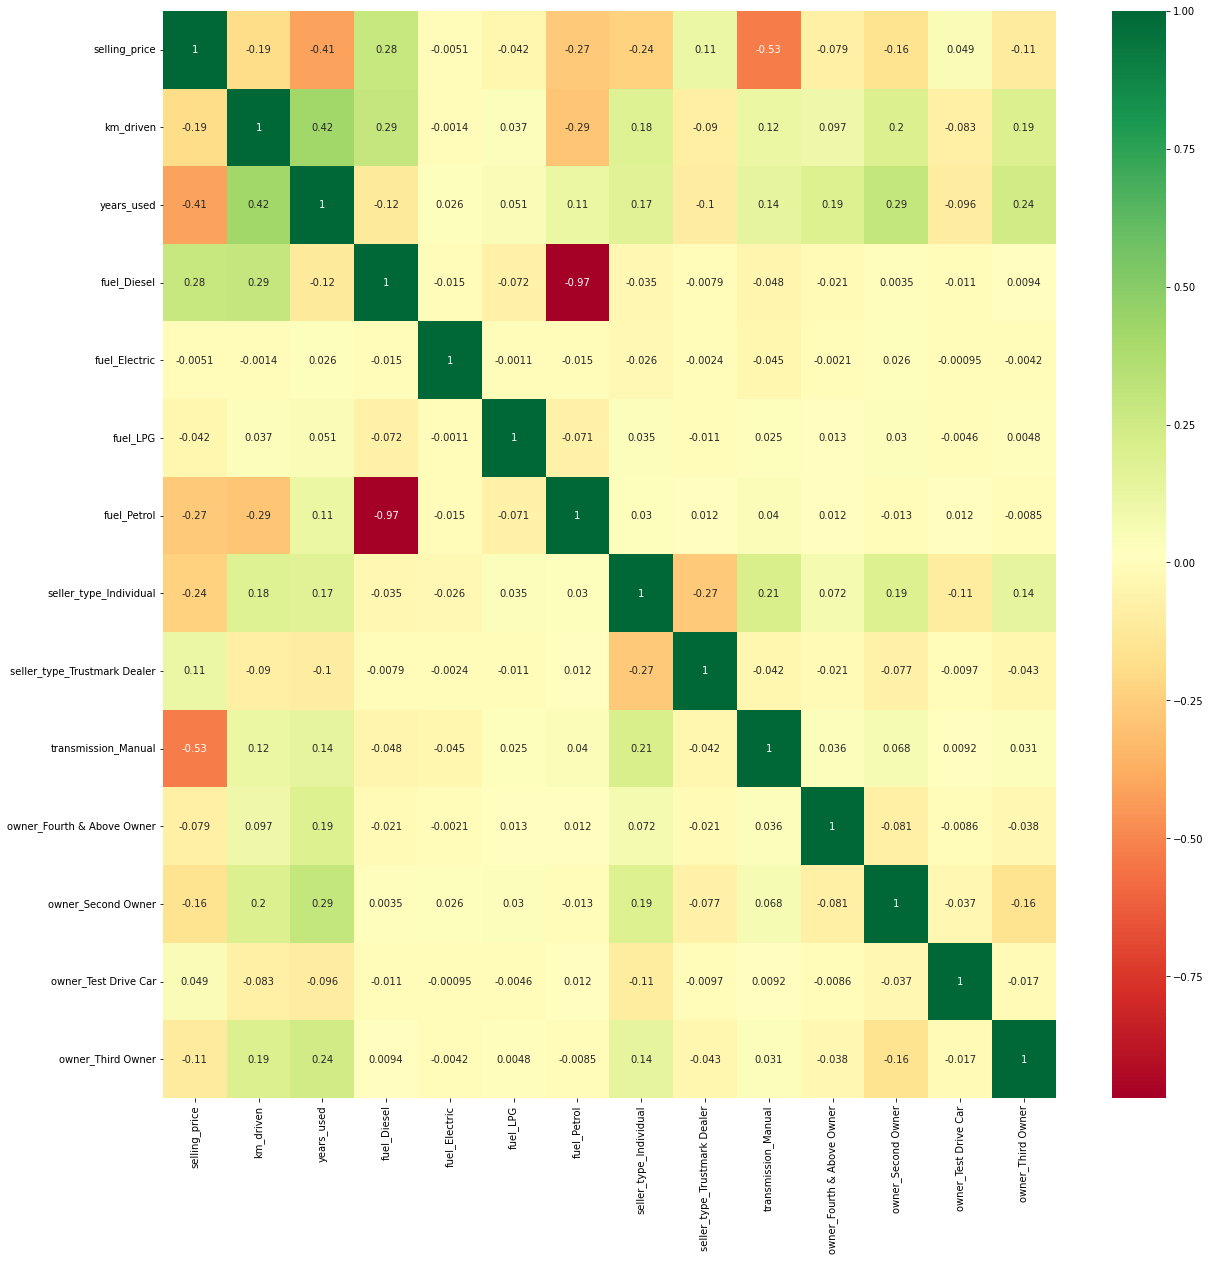

In [23]:
#finding the correlation
corrmat = final_dataset.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#pltting the heatmap
h = sns.heatmap(final_dataset[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [25]:
#dependent and independent features
X = final_dataset.iloc[:,1:]
y = final_dataset.iloc[:,0]

In [26]:
X.head()

,km_driven,years_used,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,70000,15,0,0,0,1,1,0,1,0,0,0,0
1,50000,15,0,0,0,1,1,0,1,0,0,0,0
2,100000,10,1,0,0,0,1,0,1,0,0,0,0
3,46000,5,0,0,0,1,1,0,1,0,0,0,0
4,141000,8,1,0,0,0,1,0,1,0,1,0,0


In [27]:
y.head()

0     60000
1    135000
2    600000
3    250000
4    450000
Name: selling_price, dtype: int64

In [28]:
#feature importance
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [30]:
print(model.feature_importances_)

[2.46408975e-01 2.46975774e-01 1.30610148e-01 4.08424364e-05
 2.51983054e-05 2.24694203e-04 4.63725335e-02 8.93466424e-03
 2.92832157e-01 7.27791365e-04 2.23234231e-02 7.41858439e-04
 3.78194086e-03]


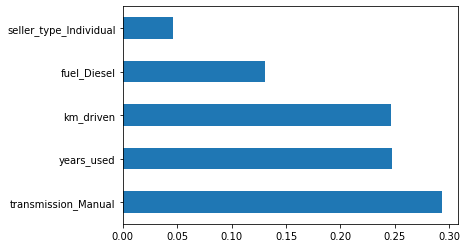

In [33]:
#plot graph of feature importances for better visualization 
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh') 
plt.show()

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [35]:
X_train.head()

,km_driven,years_used,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
3818,15000,3,0,0,0,1,0,0,0,0,0,0,0
3045,25000,3,0,0,0,1,1,0,0,0,0,0,0
4176,120000,8,1,0,0,0,1,0,1,0,0,0,0
3441,30000,6,0,0,0,1,1,0,1,0,1,0,0
1183,40000,12,0,0,0,1,1,0,1,0,1,0,0


In [37]:
X_train.shape

(3472, 13)

In [51]:
#Building the model

from sklearn.ensemble import RandomForestRegressor
rf_random = RandomForestRegressor()

In [52]:
#Randomized Search CV
#Hyperparamteres

from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start=100,stop=1200,num=12)]

#Number of features to consider at every split
max_features =["auto","sqrt"]

#Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5,30,num=6)]

#max_depth.append(None)
#Minimum number of samples required to split a node
min_samples_split = [2,5,10,15,100]
#Minimum number of samples required at each leaf node
min_samples_leaf = [1,2,5,10]

In [53]:
#creating the random grid
random_grid = {"n_estimators":n_estimators,
              "max_features":max_features,
              "max_depth":max_depth,
              "min_samples_split":min_samples_split,
              "min_samples_leaf":min_samples_leaf}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [54]:
# use the random grid to search for best parameters
# first create the base model to tune
rf=RandomForestRegressor()

In [56]:
rf_random = RandomizedSearchCV(estimator =rf, param_distributions=random_grid,scoring="neg_mean_squared_error",n_iter=10,cv=5,verbose=2,random_state=42,n_jobs=1)

In [57]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   5.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   5.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [58]:
predictions = rf_random.predict(X_test)

In [59]:
predictions

array([ 354836.43683935,  131901.14722298,  239396.55749497,
        521020.33495851,   85201.93866802,  134027.95452479,
        497829.41856983,  379104.47260677,   96334.98834203,
        758890.05857917,  218166.02897221,  671427.40873543,
        328503.74138323,  791648.52653563,  248687.73626475,
        228050.24294264,  726570.6097039 ,  522017.6681401 ,
        311313.52396493,  461139.4504909 ,  269905.03902619,
        120516.07450718,  714981.1406741 ,  678662.83392524,
         82522.65121036, 1475134.98547557,  269639.882083  ,
        550267.57386949,  328321.04736252,  190242.16002413,
        253931.25581173,  588124.25346836,  714981.1406741 ,
        593372.05438671, 1074126.68544873,  272414.26481574,
        687841.12595549,  988582.05416948,  430955.93746638,
        700081.71794523,  813429.39661772,  726570.6097039 ,
        445280.94329888,  428649.92359408,  448864.74266201,
        435471.08972508,  112288.67505142,  375794.82783716,
       1673220.96982464,

C:\Users\Newton\anaconda3\envs\carprediction\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='selling_price', ylabel='Density'>

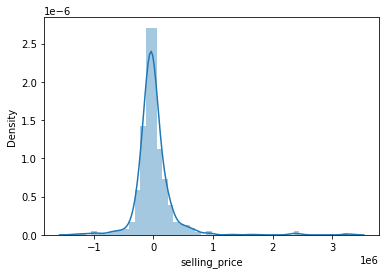

In [60]:
#comparing the pedictions
sns.distplot(y_test-predictions)

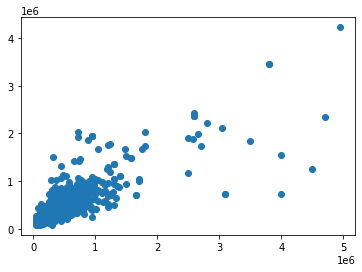

In [61]:
#scatter plot
plt.scatter(y_test,predictions)

In [62]:
import pickle

In [63]:
#opening a file and storing the data
file =open("random_forest_regression_model.pkl","wb")
#dumping the information to that file
pickle.dump(rf_random,file)